<a href="https://colab.research.google.com/github/sunnywood0906/Programming-Language/blob/main/programming_language_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving exams.csv to exams.csv


In [2]:
import pandas as pd
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


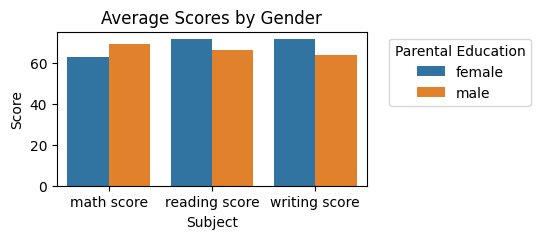

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 性別平均成績
gender_mean = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()
gender_melted = pd.melt(gender_mean, id_vars='gender', var_name='Subject', value_name='Average Score')

# 畫圖
plt.figure(figsize=(4, 2))
sns.barplot(data=gender_melted, x='Subject', y='Average Score', hue='gender')
plt.title('Average Scores by Gender')
plt.ylabel('Score')
plt.xlabel('Subject')
plt.legend(title='Parental Education', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.show()

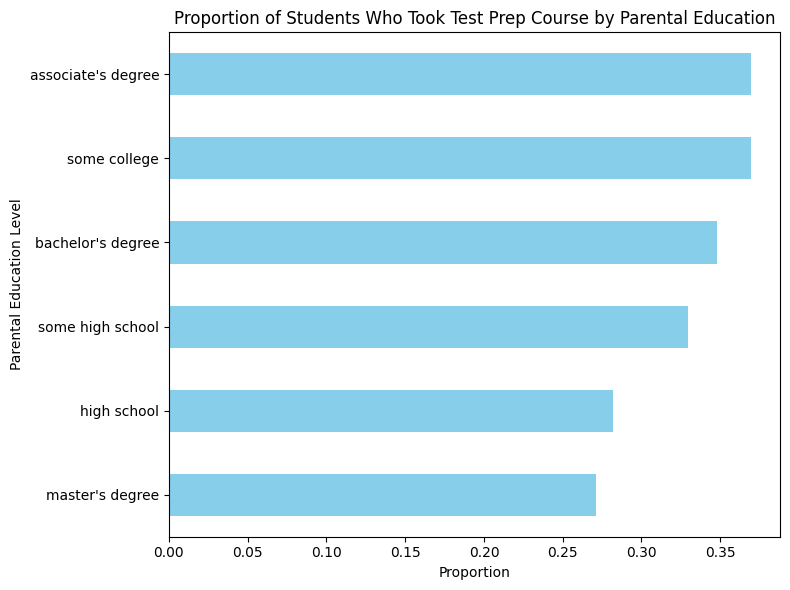

In [11]:
# 補習與父母教育程度的關係
prep_rate = df[df['test preparation course'] == 'completed'].groupby('parental level of education').size() / df.groupby('parental level of education').size()

# 繪圖
prep_rate = prep_rate.sort_values()
prep_rate.plot(kind='barh', color='skyblue', figsize=(8,6))
plt.title('Proportion of Students Who Took Test Prep Course by Parental Education')
plt.xlabel('Proportion')
plt.ylabel('Parental Education Level')
plt.tight_layout()
plt.show()

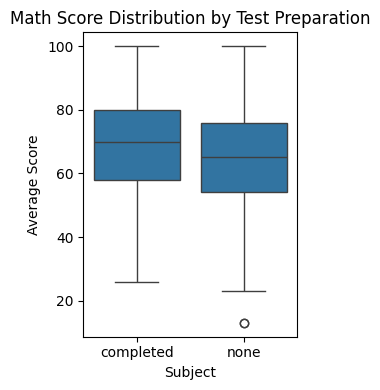

In [26]:
#補習與平均成績關係
prep_score = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().reset_index()
prep_score_melted = pd.melt(prep_score, id_vars='test preparation course', var_name='Subject', value_name='Average Score')

# 畫圖
plt.figure(figsize=(3, 4))
sns.boxplot(data=df, x='test preparation course', y='math score')
plt.title('Math Score Distribution by Test Preparation')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()